# <div class="alert alert-block alert-warning"><h2 style="text-align:Center;color:black"> Sign Language Classification </h2> </div>


Speech impaired people use hand signs and gestures to communicate. Normal people face difficulty in understanding their language. Hence there is a need of a system which recognizes the different signs, gestures and conveys the information to the normal people.

The dataset can be used for learning how to develop,evaluate and use convolutional deep learning neural networks for classification of images.

This is the Example of Multiclass classification problem.

This includes how to develop a robust test harness for estimating the performance of the model, exploring improvements for the model by changing the paramters of the model, saving and loading the model to make predicitions on new data.


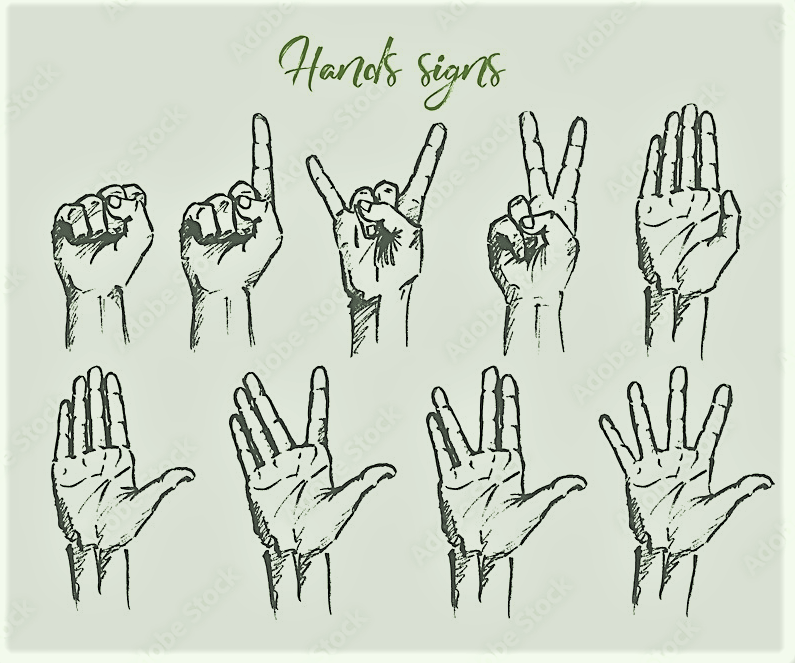

## <div class="alert alert-block alert-warning"><h2 style="text-align:Center;color:black">Table of Content </h2> </div>

1. [Data Description](#2)
1. [Import Libraries](#3)
1. [Data Extraction](#4)
1. [Data Exploration](#5)
1. [Train Valid Test Split](#6)
1. [Data Preparation](#7)
    1. [Image Data Generator](#8)
    1. [Flow from directory](#9)
1. [Deep learning Model](#10)
    1. [Model Layers](#11)
    1. [Callbacks](#12)
    1. [Compile Model](#13)
    1. [Fit Model](#14)
    1. [Model History](#14.1)
    1. [Evaluvation Model](#15)
    1. [Plot Result](#16)
1. [Prediction](#17)
    1. [Classification Report](#18)
    1. [Confussion Matrix ](#19)
1. [Conclusion](#20)

<a id='2'></a>
## <div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Description </h2> </div>

The data set is a collection of images of alphabets from the American Sign Language, separated in 36 folders which represent the various classes.

The data set contains 7200 images which are 400x400 pixels. There are 36 classes.

The 36 classes contain 0-9 and A-Z alphabets.

<a id='3'></a>
## <div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Import Libraries </h2> </div> 

In [1]:
import os 
import re
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import splitfolders

#Import Deep learning Libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Input, concatenate
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('Modules Loaded')

Modules Loaded


<a id='4'></a>
## <div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Extraction </h2> </div>
### In this part we are going to extract an image of each class we have.

In [2]:
# Path where our data is located
import os
os.chdir('D:\\Projects\\DL\\ASLDataset')
base_path = ""

# Dictionary to save our 36 classes
categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(
        lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2]
        + "/"
        + x if re.search("_", x) is not None else x
    )
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename" : filenames_list, "category" : categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac = 1).reset_index(drop = True)

In [3]:
df.head(10)

filename  category
0                           A914.jpg        10
1                           V205.jpg        31
2                           1472.jpg        24
3                           W933.jpg        32
4                           1291.jpg        15
5                            139.jpg         8
6  x/hand2_x_left_seg_2_cropped.jpeg        33
7                           1382.jpg         3
8                           U117.jpg        30
9                            577.jpg         9

In [4]:
print("number of elements = ", len(df))

number of elements =  7200


<a id='5'></a>
## <div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Exploration </h2> </div>

#### First, we start by visualizing the variable of interest.

#### Let's view more images in a grid format.

# <h5 style="text-align:center;color:Green"> We visualize few images of ASL. </h5>

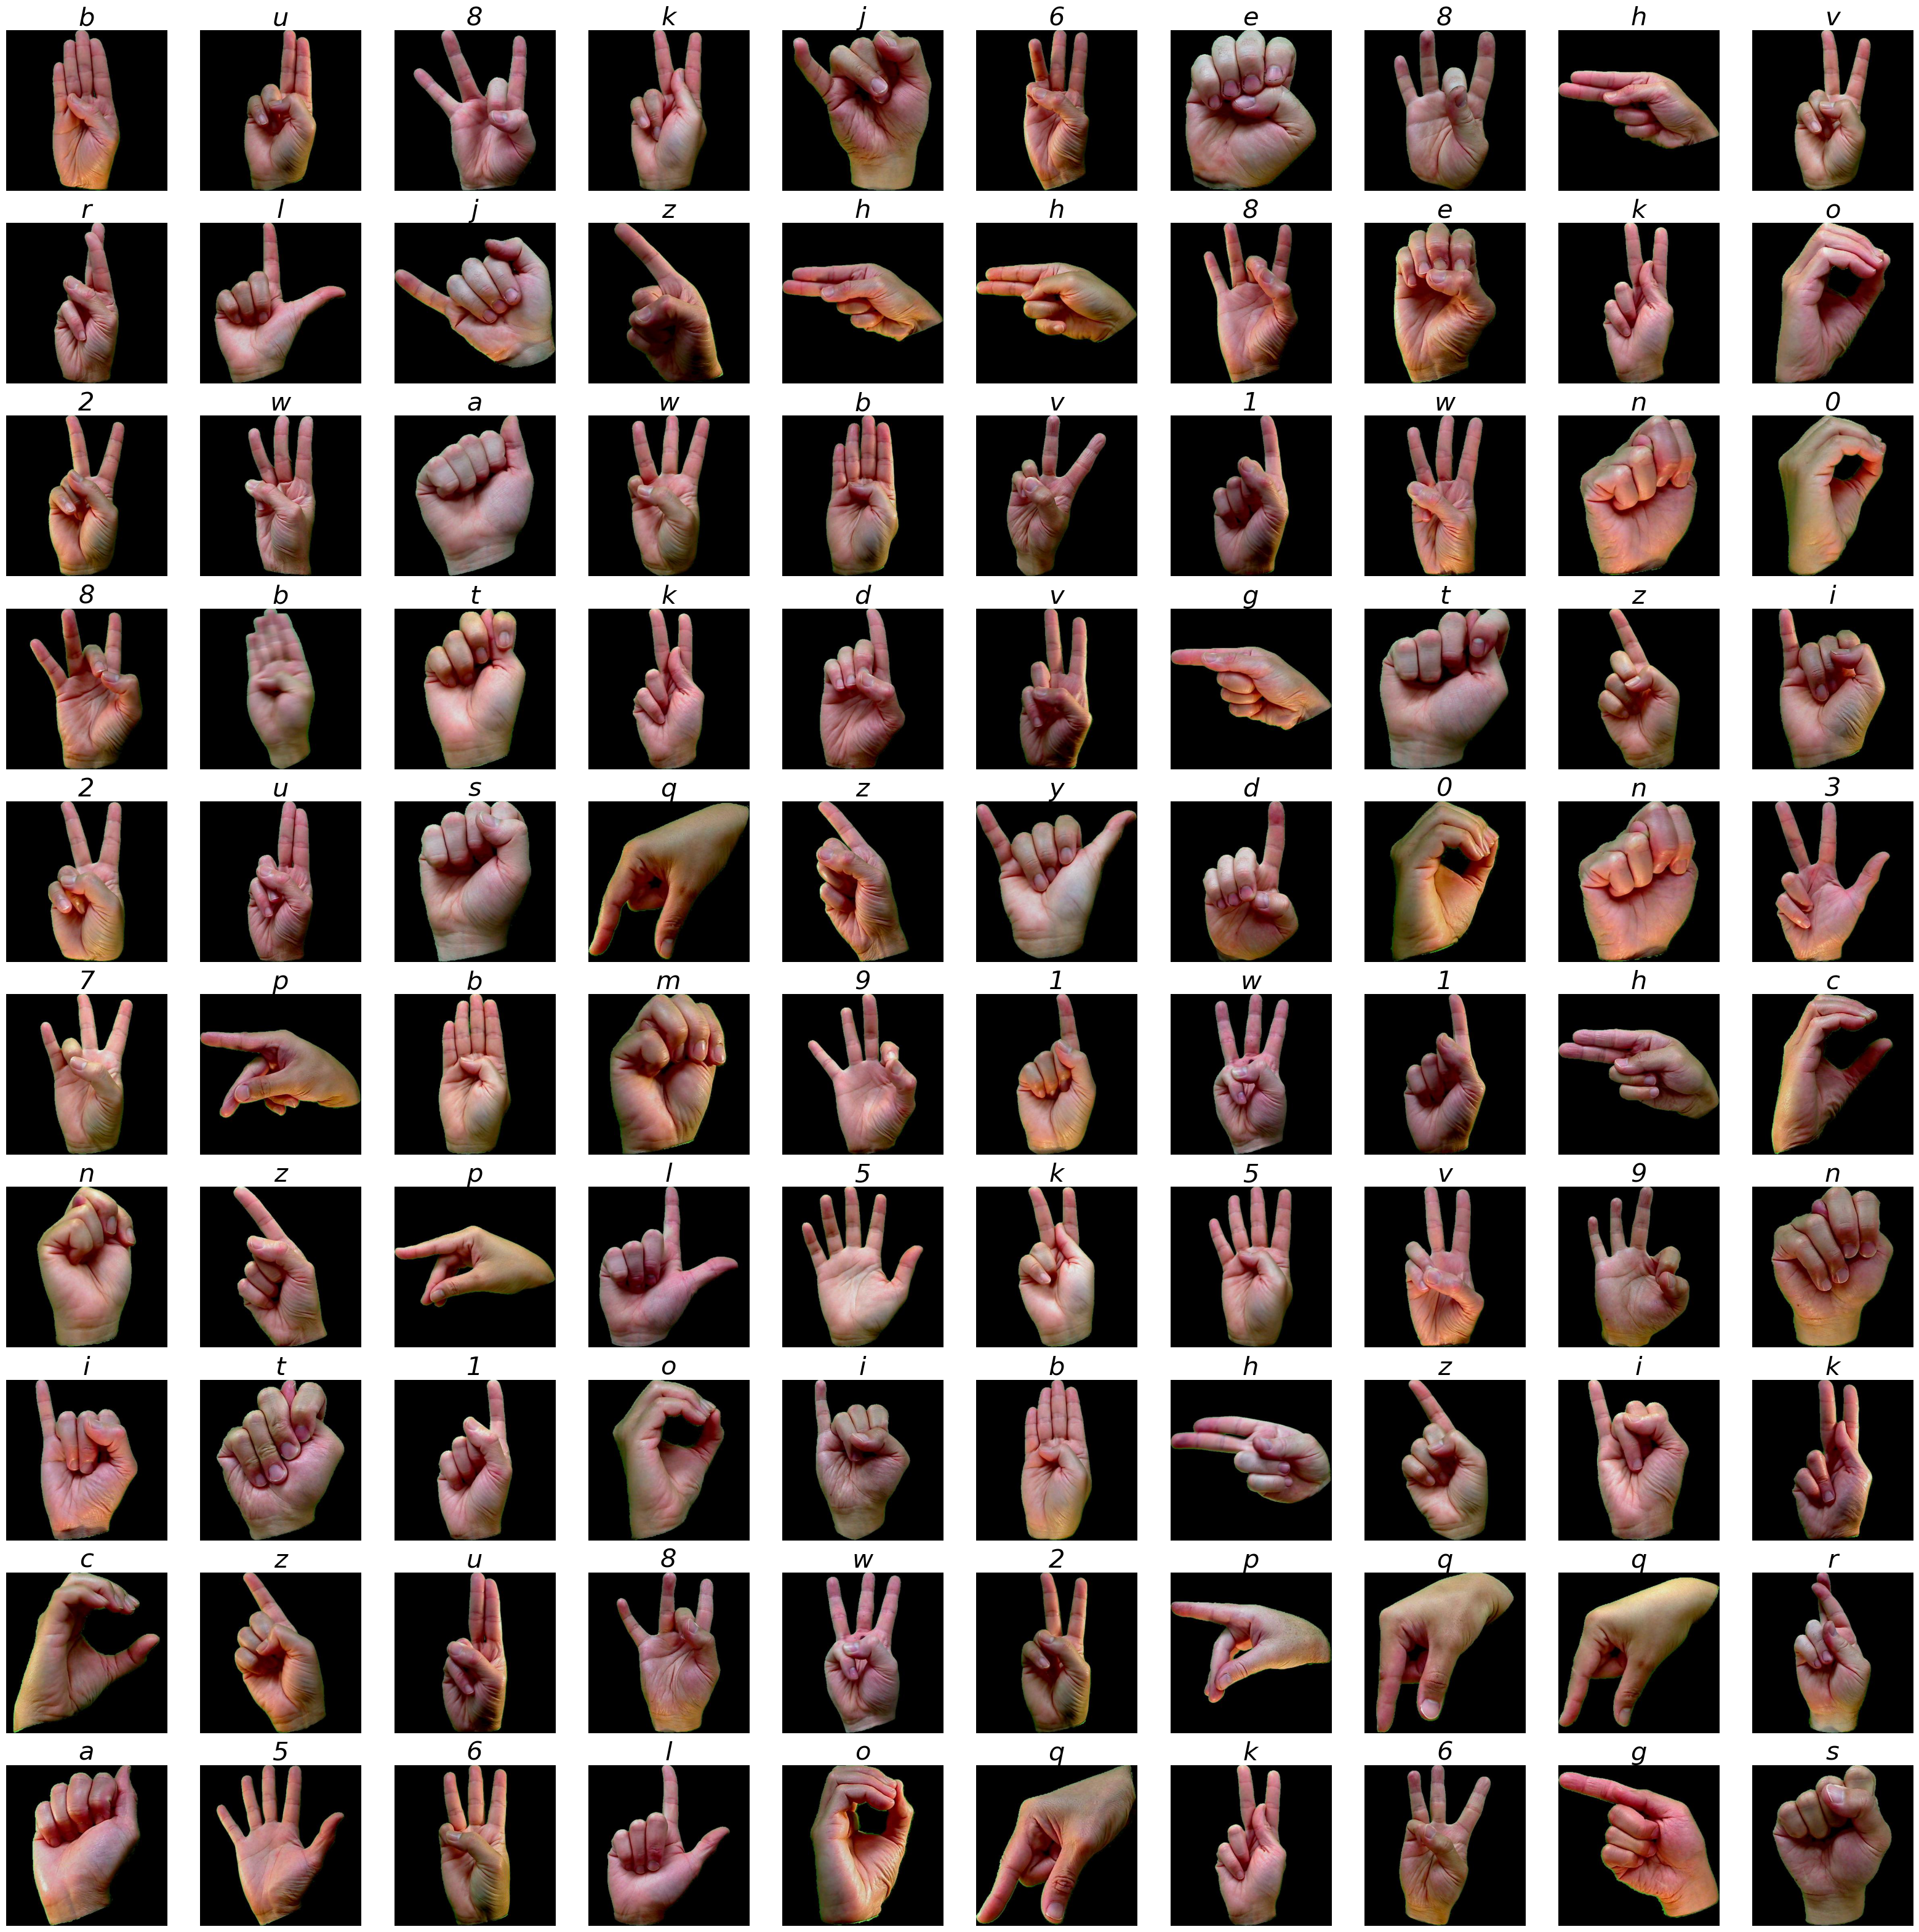

In [5]:
def load_unique():
    import os
    os.chdir('D:\\Projects\\DL\\Load_Unique_ASLDataset')
    base_path = ""

    categories = {0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6",
                  7: "7", 8: "8", 9: "9", 10: "a", 11: "b", 12: "c", 13: "d",
                  14: "e", 15: "f", 16: "g", 17: "h", 18: "i", 19: "j", 20: "k",
                  21: "l", 22: "m", 23: "n", 24: "o", 25: "p", 26: "q", 27: "r",
                  28: "s", 29: "t", 30: "u", 31: "v", 32: "w", 33: "x", 34: "y", 35: "z"}

    def add_class_name_prefix(df, col_name):
        df[col_name] = df[col_name].apply(
            lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2]
            + "/"
            + x
        )
        return df


    filenames_list = []
    categories_list = []

    for category in categories:
        filenames = os.listdir(base_path + categories[category])
        filenames_list = filenames_list + filenames
        categories_list = categories_list + [category] * len(filenames)
    df = pd.DataFrame({"filename" : filenames_list, "category" : categories_list})
    df = add_class_name_prefix(df, "filename")
    df = df.sample(frac = 1).reset_index(drop = True)
    plt.figure(figsize=(40,40))

    for i in range(100):
        path = base_path + df.filename[i]
        img = plt.imread(path)
        plt.subplot(10, 10, i + 1)
        plt.imshow(img)
        plt.title(categories[df.category[i]], fontsize = 30, fontstyle = 'italic')
        plt.axis("off")
        
load_unique()

#### Now, we will see the distrubution of data in every class.

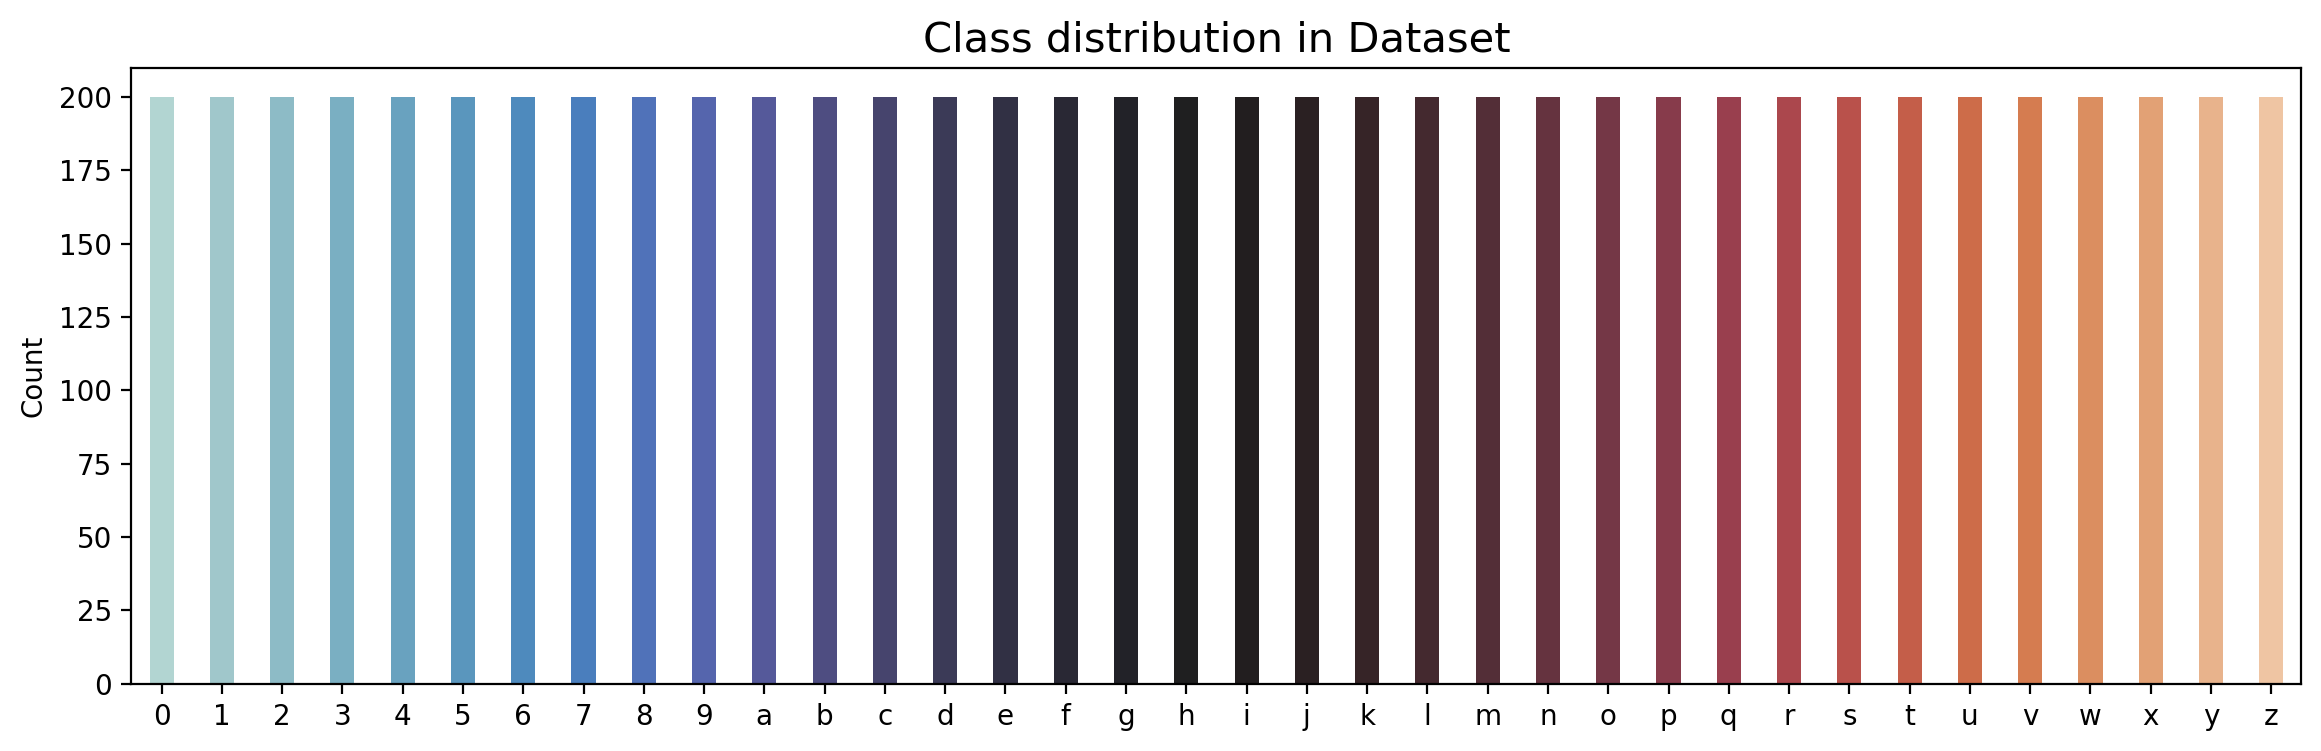

In [6]:
label, count = np.unique(df.category, return_counts = True)
uni = pd.DataFrame(data = count, index = categories.values(), columns = ['Count'])

plt.figure(figsize=(14, 4), dpi=200)
sns.barplot(data = uni, x = uni.index, y = 'Count', palette = 'icefire', width = 0.4).set_title('Class distribution in Dataset', fontsize = 15)
plt.show()

<a id='6'></a>
### <div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Split Dataset into Train, Valid and Test Datasets </h2> </div>

#### We will split the data in three parts.
* Training dataset (80%)
* Validation dataset (10%)
* Testing dataset (10%)

In [7]:
splitfolders.ratio('D:\\Projects\DL\\ASLDataset', output='output', seed=1333, ratio=(0.8, 0.1, 0.1))

Copying files: 7200 files [00:12, 588.71 files/s] 


<a id='7'></a>
## <div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Preparation </h2> </div>

<a id='8'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Image Data Generator </h3> </div>

#### * The data for will used by flow_from_directory.
#### * The batch size is 64 and the image size is (64, 64).
#### * The Image Data Generator will be used to rescale the images.

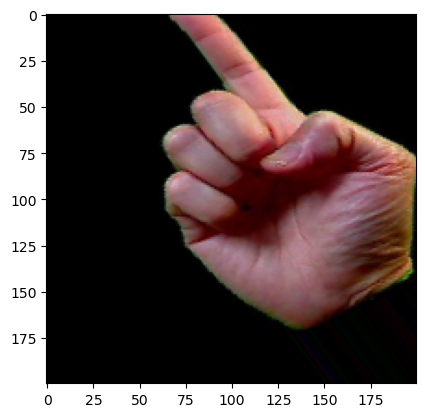

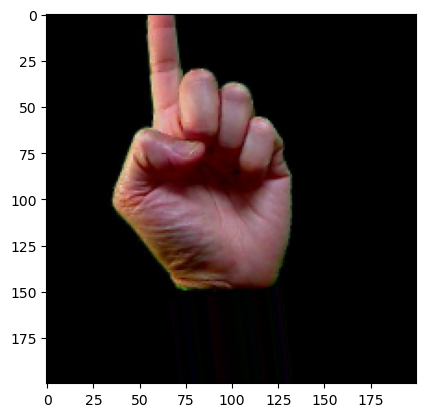

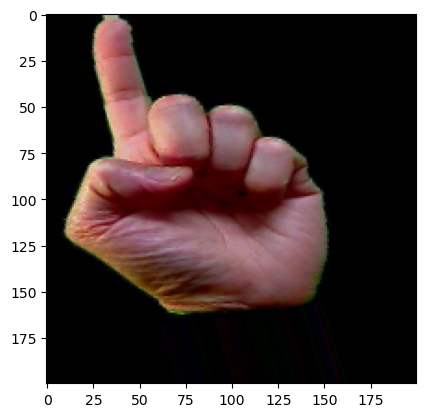

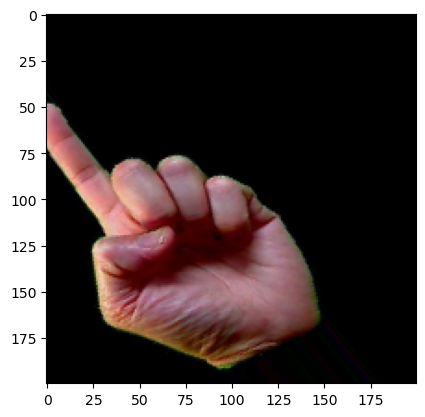

In [8]:
# Create an instance of the ImageDataGenerator with specified augmentations
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

# Load an example image
from tensorflow.keras.preprocessing import image

img_path = 'D:\Projects\DL\ASLDataset\d\hand1_d_right_seg_2_cropped.jpeg'  # Replace with the path to your image
img = image.load_img(img_path, target_size = (200, 200))

# Convert the image to a numpy array
x = image.img_to_array(img)

# Reshape the image to (1, 200, 200, 3) as the generator expects batches
x = np.expand_dims(x, axis = 0)

# Generate augmented images
i = 0
for batch in train_datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [9]:
datagen = ImageDataGenerator(rescale= 1.0 / 255)

### Finally, we will list out all the important parameters and respective values.

In [10]:
train_path = 'output/train'
val_path = 'output/val'
test_path = 'output/test'

batch = 64
image_size = 64
img_channel = 3
n_classes = 36

<a id='9'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">  Flow from Directory </h3> </div>

* We will import the data from directory.
* we will set **shuffle = False** for test data.

In [11]:
train_data = train_datagen.flow_from_directory(directory = train_path, 
                                         target_size =(image_size, image_size), 
                                         batch_size = batch,
                                         class_mode ='categorical')


val_data = datagen.flow_from_directory(directory = val_path, 
                                       target_size =(image_size, image_size), 
                                       batch_size = batch, 
                                       class_mode ='categorical')

test_data = datagen.flow_from_directory(directory = test_path, 
                                         target_size = (image_size, image_size), 
                                         batch_size = batch, 
                                         class_mode = 'categorical',
                                         shuffle= False)

Found 5760 images belonging to 36 classes.
Found 720 images belonging to 36 classes.
Found 720 images belonging to 36 classes.


<a id='10'></a>
## <div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Deep Learning Model </h2> </div>


<a id='11'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">Model Layers </h3> </div>


### Architecture

The architecture of the American Sign Langauge Image Classification model consists of the following Layers and components:

#### Layers :
* The input layer consist of a Conv2D with 32 filters and activation relu.
* The model contain the 3 blocks of convolution with increasing filters and activation relu.
* Each convolution block contains Max pooling (pool_size = 2) and Dropout (0.2).
* The fully connected layers contain Flatten layer, Dense layer with 512 units and a Dropout layer.
* The output layer is a Dense layer with 36 units and softmax activation.

#### Components:

* **Input Layer:** Receives input images for classification.
* **Convolutional Layers:** Extract features from the images through convolutional operations.
* **Pooling Layers:** Reduce the spatial dimensions of the feature maps.
* **Flatten Layer:** Convert the 2D feature maps into a 1D vector.
* **Fully Connected Layers:** Perform classification using densely connected layers.
* **Output Layer:** Provides the final prediction probabilities for cat and dog classes.

In [12]:
model = Sequential()
# input layer
# Block 1
model.add(Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape = (image_size,image_size, img_channel)))
model.add(Conv2D(32, 3, activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(padding = 'same'))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(padding = 'same'))
model.add(Dropout(0.3))

# Block 3
model.add(Conv2D(128, 3, activation = 'relu', padding = 'same'))
model.add(Conv2D(128, 3, activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(padding = 'same'))
model.add(Dropout(0.4))

# fully connected layer
model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(36, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                        

<a id='12'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Callbacks </h3> </div>
 -  We will be using Two Callbacks 

* **ReduceLROnPlateau :** Reduce learning rate when a metric has stopped improving.
* **EarlyStopping :** Stop training when a monitored metric has stopped improving.
* **ModelCheckpoint :** To save the model's weights during training based on specified conditions.

In [13]:
# Define the EarlyStopping callback
early_stoping = EarlyStopping(monitor = 'val_loss', 
                              min_delta = 0.001,
                              patience = 5,
                              restore_best_weights = True, 
                              verbose = 1)

# Define the ReduceLROnPlateau callback
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_accuracy', 
                                         patience = 2, 
                                         factor = 0.5 , 
                                         verbose = 1)

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath = 'model_checkpoint_{epoch:02d}_{val_loss:.2f}.h5',
                             monitor = 'val_loss', save_best_only = True)

<a id='13'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Compile the Model </h3> </div>
Finally we will compile the model .There are 3 things to mention here : Optimizer, Loss, Metrics

* **Optimizer** :- To minimize cost function we use different methods For ex :- like gradient descent, stochastic gradient descent. So these are call optimizers. We are using a default one here which is adam.
​
* **Loss** :- To make our model better we either minimize loss or maximize accuracy. Neural Networks always minimize loss. To measure it we can use different formulas like 'categorical_crossentropy' or 'binary_crossentropy'. Here I have used binary_crossentropy.
​
* **Metrics** :- This is to denote the measure of your model. Can be accuracy or some other metric.

In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'])

<a id='14'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Fit the Model </h3> </div>

We are now going to train our compiled model using the train data and use the val data as a validation dataset during training.

The number of steps for the train and validation iterators must be specified. This is the number of batches that will comprise one epoch. This can be specified via the length of each iterator, and will be the total number of images in the train and validation directories divided by the batch size (64).

The model will be fit for 12 epochs.

In [15]:
ASL_Model = model.fit(train_data, 
                      validation_data = val_data, 
                      epochs = 12, 
                      callbacks=[early_stoping, reduce_learning_rate, checkpoint],
                      verbose = 1)

Epoch 1/12
90/90 [==============================] - 66s 722ms/step - loss: 3.4548 - accuracy: 0.0503 - val_loss: 3.0365 - val_accuracy: 0.1014 - lr: 0.0010
Epoch 2/12
90/90 [==============================] - 46s 511ms/step - loss: 2.5060 - accuracy: 0.2436 - val_loss: 1.2658 - val_accuracy: 0.6194 - lr: 0.0010
Epoch 3/12
90/90 [==============================] - 45s 496ms/step - loss: 1.2474 - accuracy: 0.6014 - val_loss: 0.6203 - val_accuracy: 0.7986 - lr: 0.0010
Epoch 4/12
90/90 [==============================] - 48s 531ms/step - loss: 0.7917 - accuracy: 0.7363 - val_loss: 0.4420 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 5/12
90/90 [==============================] - 44s 493ms/step - loss: 0.5431 - accuracy: 0.8108 - val_loss: 0.2656 - val_accuracy: 0.9069 - lr: 0.0010
Epoch 6/12
90/90 [==============================] - 45s 498ms/step - loss: 0.4165 - accuracy: 0.8575 - val_loss: 0.2196 - val_accuracy: 0.9097 - lr: 0.0010
Epoch 7/12
90/90 [==============================] - 45s 502ms/st

<a id='14.1'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Model History </h3> </div>

In [16]:
# Model Metrics
metrics = pd.DataFrame(ASL_Model.history)
print("The Model Metrics are")
metrics

The Model Metrics are


loss  accuracy  val_loss  val_accuracy     lr
0   3.454805  0.050347  3.036544      0.101389  0.001
1   2.506005  0.243576  1.265803      0.619444  0.001
2   1.247382  0.601389  0.620326      0.798611  0.001
3   0.791685  0.736285  0.441987      0.850000  0.001
4   0.543143  0.810764  0.265553      0.906944  0.001
5   0.416474  0.857465  0.219567      0.909722  0.001
6   0.340861  0.886458  0.174779      0.950000  0.001
7   0.277925  0.906424  0.171930      0.954167  0.001
8   0.243833  0.910764  0.111943      0.962500  0.001
9   0.202904  0.930382  0.073805      0.980556  0.001
10  0.204657  0.933160  0.083897      0.968056  0.001
11  0.162997  0.945139  0.063948      0.983333  0.001

<a id='15'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">  Evaluate the Model </h3> </div>

#### We will evaluvate the Training and validation data accuracy and loss.

In [17]:
# Evaluvate for train generator
loss, acc = model.evaluate(train_data, verbose = 0)

print('The accuracy of the model for training data is:', acc*100)
print('The Loss of the model for training data is:', loss)

# Evaluvate for validation generator
loss, acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:', acc*100)
print('The Loss of the model for validation data is:', loss)

The accuracy of the model for training data is: 99.14930462837219
The Loss of the model for training data is: 0.030657531693577766
The accuracy of the model for validation data is: 98.33333492279053
The Loss of the model for validation data is: 0.06394823640584946


<a id='16'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Plot Acc and Loss Curves </h3> </div>

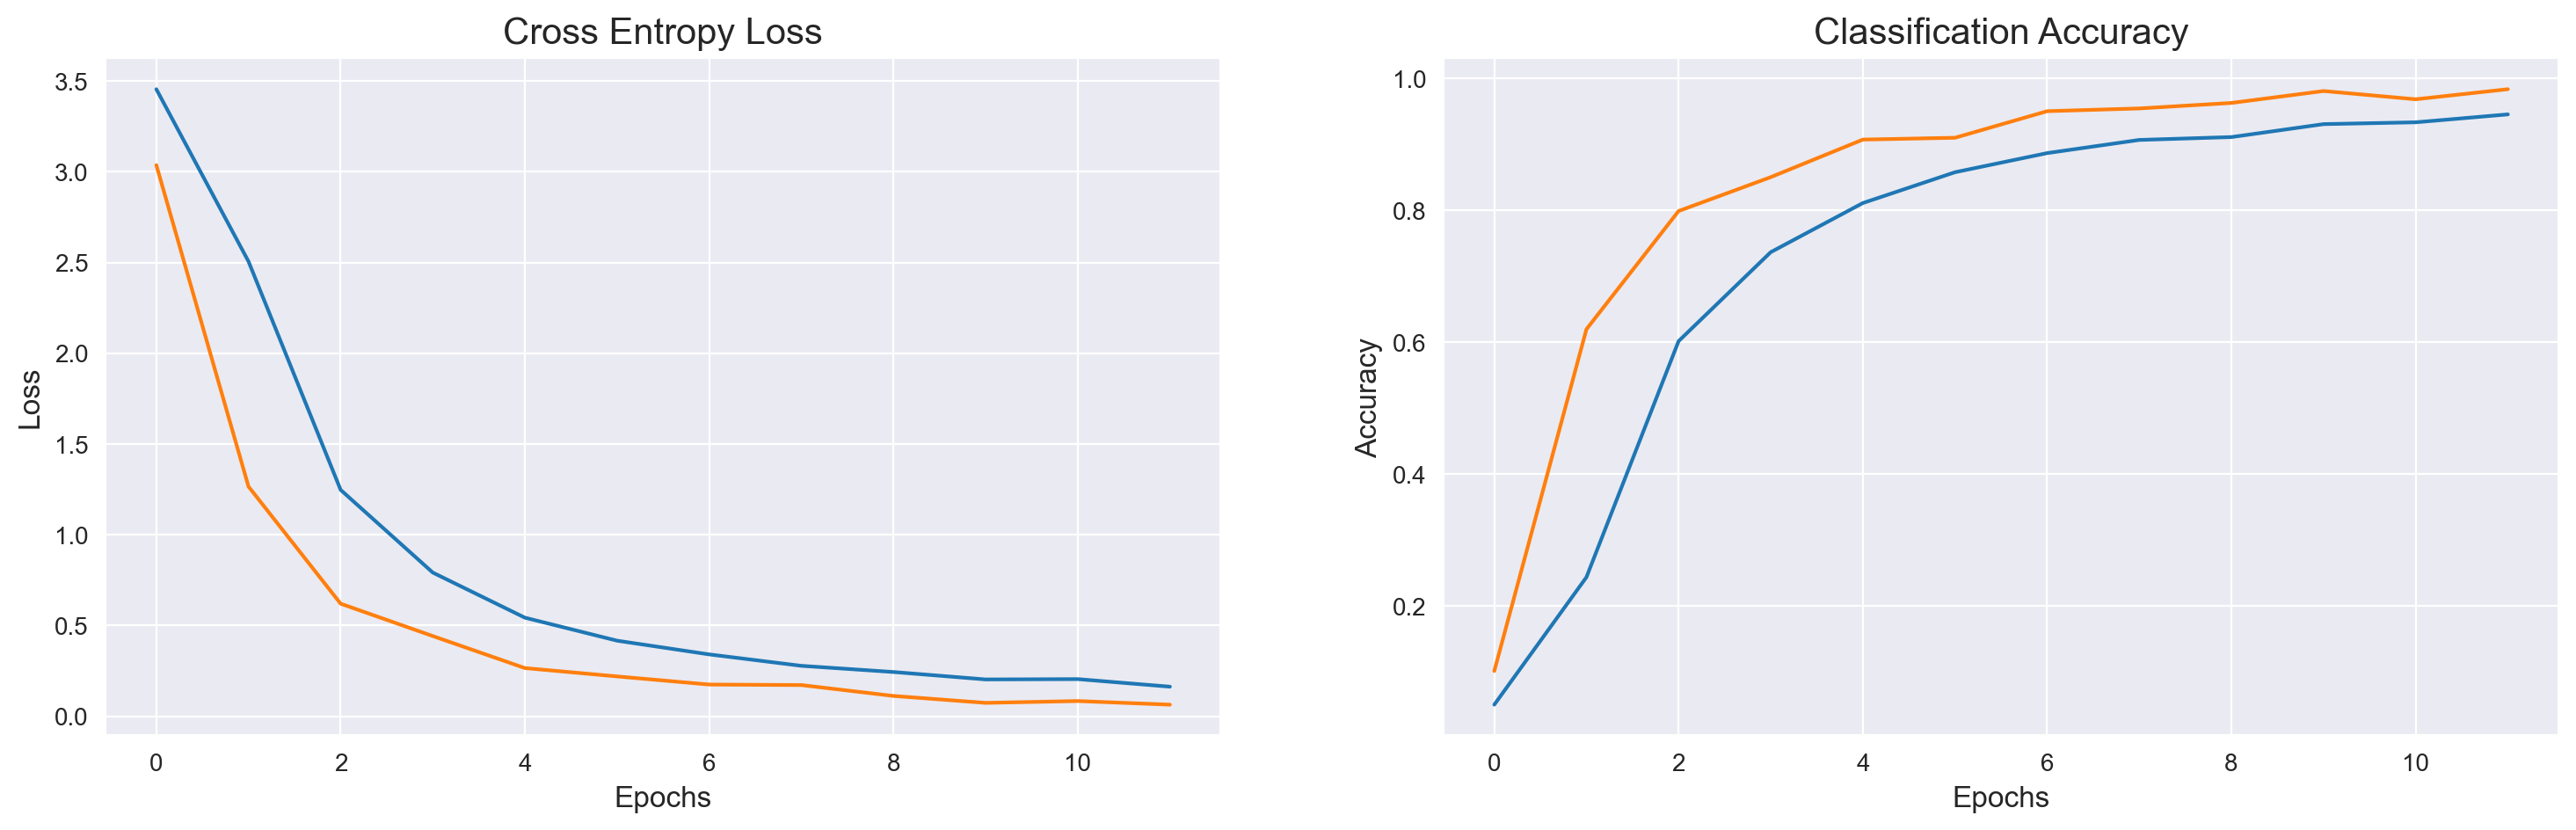

In [18]:
# plots for accuracy and Loss with epochs
error = pd.DataFrame(ASL_Model.history)

plt.figure(figsize=(18, 5), dpi = 200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

<a id='17'></a>
## <div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Prediction </h2> </div>

#### Now, we will predict the labels for the test data which will give us clear idea about the accuracy of the model.


In [19]:
# prediction
predictions = model.predict(test_data, verbose = 0)

y_pred = np.argmax(predictions, axis = 1)

y_true = test_data.labels

# Evaluvate
loss, acc = model.evaluate(test_data, verbose = 0)

print('The accuracy of the model for testing data is:', acc*100)
print('The Loss of the model for testing data is:', loss)

The accuracy of the model for testing data is: 96.94444537162781
The Loss of the model for testing data is: 0.10338097810745239


#### The count of correctly and incorrectly classified images.

In [20]:
p = y_pred
y = y_true
correct = np.nonzero(p == y)[0]
incorrect = np.nonzero(p != y)[0]

print("Correct predicted classes:", correct.shape[0])
print("Incorrect predicted classes:", incorrect.shape[0])

Correct predicted classes: 698
Incorrect predicted classes: 22


<a id='18'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Classification Report </h3> </div>

In [21]:
print(classification_report(y_true, y_pred,target_names= categories.values()))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      1.00      1.00        20
           2       1.00      0.90      0.95        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      0.95      0.97        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
           a       1.00      0.95      0.97        20
           b       0.95      0.95      0.95        20
           c       0.95      0.95      0.95        20
           d       0.95      1.00      0.98        20
           e       0.86      0.95      0.90        20
           f       1.00      0.95      0.97        20
           g       1.00      1.00      1.00        20
           h       0.95    

<a id='19'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Plot Confussion Matrix </h3> </div>

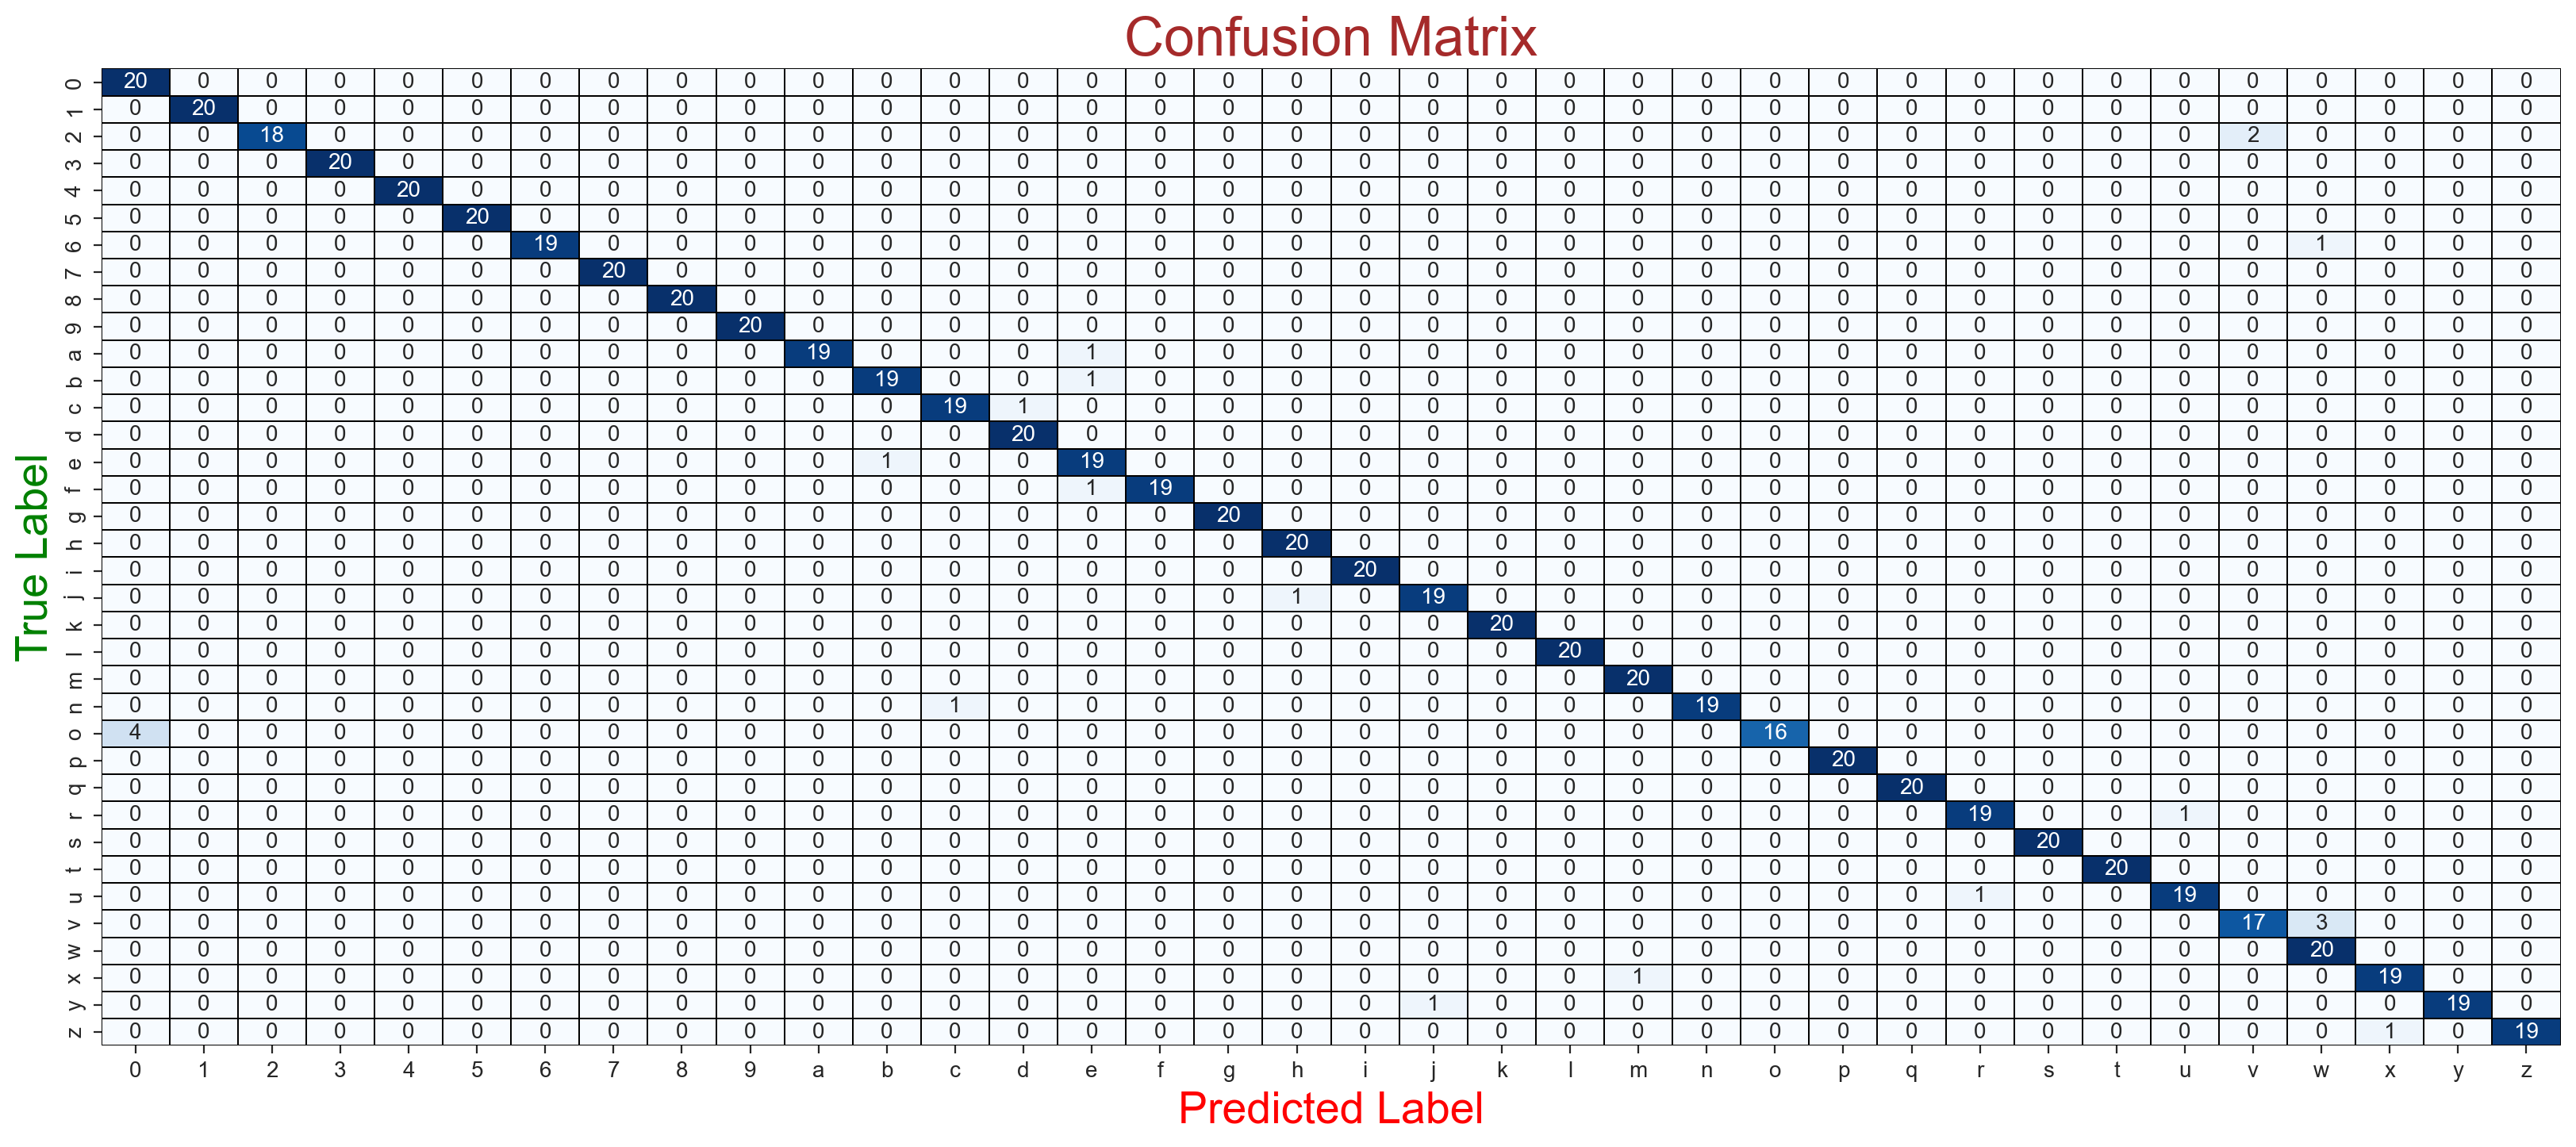

In [22]:
sns.set_style('ticks')

confusion_mtx = confusion_matrix(y_true, y_pred) 

f,ax = plt.subplots(figsize = (20,8), dpi = 200)

sns.heatmap(confusion_mtx, annot = True, 
            linewidths = 0.1, cmap = "Blues", 
            linecolor = "black", fmt = 'd', ax = ax, 
            cbar = False, xticklabels = categories.values(), 
            yticklabels = categories.values())

plt.xlabel("Predicted Label", fontdict = {'color' : 'red', 'size' : 20})
plt.ylabel("True Label", fontdict = {'color' : 'green', 'size' : 20})
plt.title("Confusion Matrix", fontdict = {'color' : 'brown', 'size' : 25})

plt.show()

<a id='20'></a>
## <div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Conclusion </h2> </div>

We successfully built a deep neural network model by implementing Convolutional Neural Network (CNN) to classify hand sign images with very high accuracy 97.00 %. 

I have tried increasing the image size which didn't result in increase the testing accuracy.

The model was used to predict the classes of the images from the independent test set and results were submitted to test the accuracy of the prediction with fresh data.

The hand sign Classification model demonstrates the successful implementation of a Convolutional Neural Network for image classification tasks.

By accurately distinguishing between images of hand signs, this project showcases the potential of deep learning algorithms in solving real-world problems involving image analysis. Through this project, we aim to inspire further exploration of CNNs and their applications in various domains,

<a id='20'></a>
## <div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Save Model </h2> </div>

In [23]:
from keras.models import load_model
model.save('ASL_Model.h5')
print("Model saved successfully...")

Model saved successfully...


<a id='20'></a>
## <div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Predict Image </h2> </div>

<a id='19'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> 7 </h3> </div>

1/1 [==============================] - 0s 94ms/step


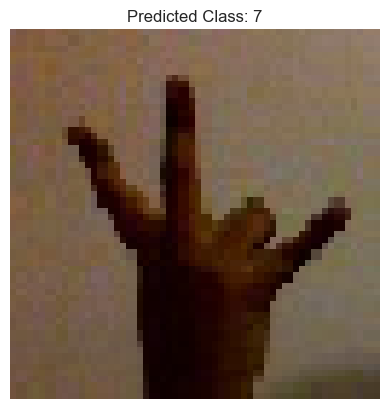

In [25]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('ASL_Model.h5')  # Replace with your model file

# Define the classes (assuming you have 36 classes)
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
           'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
           'U', 'V', 'W', 'X', 'Y', 'Z']

# Load and preprocess a test image
img_path = r'D:\Projects\DL\ASLDataset\7\217.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(64, 64))  # Adjust the target size as needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image pixel values


# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_class_label = classes[predicted_class_index]

# Display the test image and predicted class
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_label}")
plt.axis('off')
plt.show()

<a id='19'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">M</h3> </div>

1/1 [==============================] - 0s 95ms/step


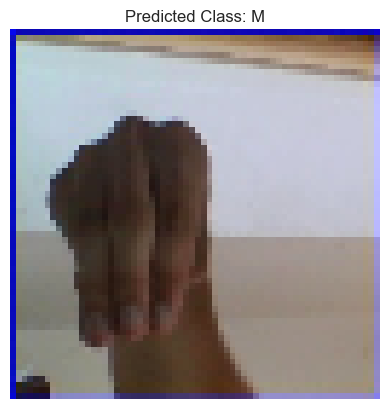

In [27]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('ASL_Model.h5')  # Replace with your model file

# Define the classes (assuming you have 36 classes)
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
           'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
           'U', 'V', 'W', 'X', 'Y', 'Z']

# Load and preprocess a test image
img_path = r'D:\Projects\DL\ASLDataset\m\M91.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(64, 64))  # Adjust the target size as needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image pixel values


# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_class_label = classes[predicted_class_index]

# Display the test image and predicted class
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_label}")
plt.axis('off')
plt.show()

<a id='19'></a>
# <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">D</h3> </div>

1/1 [==============================] - 0s 97ms/step


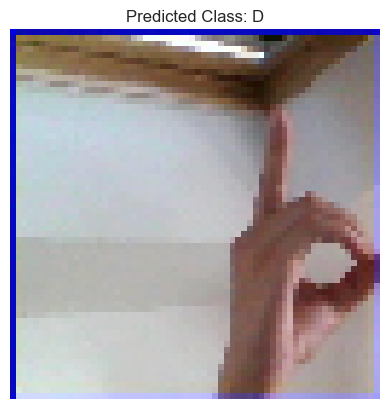

In [28]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('ASL_Model.h5')  # Replace with your model file

# Define the classes (assuming you have 36 classes)
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
           'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
           'U', 'V', 'W', 'X', 'Y', 'Z']

# Load and preprocess a test image
img_path = r'D:\Projects\DL\ASLDataset\d\D1022.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(64, 64))  # Adjust the target size as needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image pixel values


# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_class_label = classes[predicted_class_index]

# Display the test image and predicted class
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_label}")
plt.axis('off')
plt.show()

<a id='19'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">O</h3> </div>

1/1 [==============================] - 0s 94ms/step


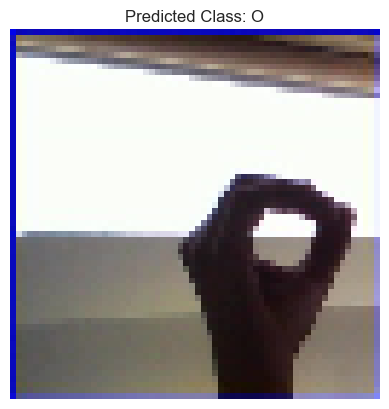

In [48]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('ASL_Model.h5')  # Replace with your model file

# Define the classes (assuming you have 36 classes)
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
           'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
           'U', 'V', 'W', 'X', 'Y', 'Z']

# Load and preprocess a test image
img_path = r'D:\Projects\DL\ASLDataset\o\O2972.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(64, 64))  # Adjust the target size as needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image pixel values


# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_class_label = classes[predicted_class_index]

# Display the test image and predicted class
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_label}")
plt.axis('off')
plt.show()

<a id='19'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">F</h3> </div>

1/1 [==============================] - 0s 94ms/step


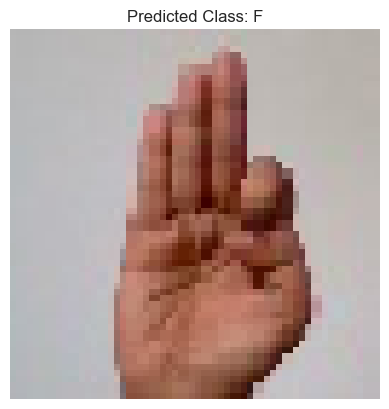

In [49]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('ASL_Model.h5')  # Replace with your model file

# Define the classes (assuming you have 36 classes)
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
           'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
           'U', 'V', 'W', 'X', 'Y', 'Z']

# Load and preprocess a test image
img_path = r'D:\Projects\DL\ASLDataset\f\1303.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(64, 64))  # Adjust the target size as needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image pixel values


# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_class_label = classes[predicted_class_index]

# Display the test image and predicted class
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_label}")
plt.axis('off')
plt.show()

<a id='19'></a>
## <div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">V</h3> </div>

1/1 [==============================] - 0s 78ms/step


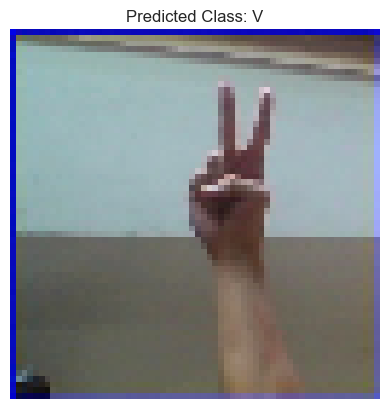

In [50]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model = load_model('ASL_Model.h5')  # Replace with your model file

# Define the classes (assuming you have 36 classes)
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
           'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
           'U', 'V', 'W', 'X', 'Y', 'Z']

# Load and preprocess a test image
img_path = r'D:\Projects\DL\ASLDataset\v\V428.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(64, 64))  # Adjust the target size as needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image pixel values


# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_class_label = classes[predicted_class_index]

# Display the test image and predicted class
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_label}")
plt.axis('off')
plt.show()